# ЗАДАНИЕ 1

Создайте объект Serias, куда внесите данные по выручке X5 за последние 5 лет. Индексами будут выступать года.

In [253]:
import pandas as pd

# ВЫРУЧКА (не розничная выручка)
years     = [2017, 2018, 2019, 2020, 2021] # годы - индексы
incomes   = [1295, 1533, 1734, 1978, 2205] # billions of rubles

result_series = pd.Series(incomes, years)
result_series

2017    1295
2018    1533
2019    1734
2020    1978
2021    2205
dtype: int64

# Задание 2

Создайте объект DataFrame, куда внесите данные из ранее созданного объекта Serias с выручкой X5.   
Затем создайте вторую колонку - туда внесите данные по чистой прибыли за последние 5 лет.   
После этого создайте колонку, куда внесите расчетную величину – отношение чистой прибыли к выручке (не забудьте умножить на 100).

In [254]:
result_series.name = 'Выручка'
df = pd.DataFrame(result_series)
df["Прибыль"] = [31.4, 28.6, 25.9, 39.2, 48.5]
df["Отношение"] = df["Прибыль"] * 100 / df["Выручка"]
df.index.name = "Годы"
df

,Выручка,Прибыль,Отношение
Годы,,,
2017,1295,31.4,2.424710
2018,1533,28.6,1.865623
2019,1734,25.9,1.493656
2020,1978,39.2,1.981800
2021,2205,48.5,2.199546


# Задание 3

Переименуйте индексы в формат ХХХ год

In [255]:
lst = list(df.index)
lst = [str(el)+" год" for el in lst]
df = df.reset_index()
df["Годы"] = lst
df

,Годы,Выручка,Прибыль,Отношение
0,2017 год,1295,31.4,2.424710
1,2018 год,1533,28.6,1.865623
2,2019 год,1734,25.9,1.493656
3,2020 год,1978,39.2,1.981800
4,2021 год,2205,48.5,2.199546


In [256]:
df = df.set_index("Годы")
df

,Выручка,Прибыль,Отношение
Годы,,,
2017 год,1295,31.4,2.424710
2018 год,1533,28.6,1.865623
2019 год,1734,25.9,1.493656
2020 год,1978,39.2,1.981800
2021 год,2205,48.5,2.199546


# Задание 4

Преобразуйте индексы в отдельную колонку, а индексы присвойте по умолчанию - автоинкремент

In [257]:
df = df.reset_index()
df.index = [ind + 1 for ind in df.index]
df

,Годы,Выручка,Прибыль,Отношение
1,2017 год,1295,31.4,2.424710
2,2018 год,1533,28.6,1.865623
3,2019 год,1734,25.9,1.493656
4,2020 год,1978,39.2,1.981800
5,2021 год,2205,48.5,2.199546


# Задание 5

Напишите код, который возьмет наш DataFrame с количеством жителей и выведет на экран в виде HTML-таблицы (используем метод, который позволит перебрать все ячейки)

 
Для работы с HTML используйте библиотеку, которую ранее мы использовали для работы с SQL:

https://colab.research.google.com/drive/1hIPGp7MXIaFPGxEYygv1zChHXheb6oMn?usp=sharing

In [258]:
# Для перебора ячеек использовать iterrows

# Подключаем библиотеки для работы с выводом в Colab
from IPython.display import display, HTML, IFrame

df8 = pd.DataFrame({
  'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
  'population': [17.04, 143.5, 9.5, 45.5],
  'square': [2724902, 17125191, 207600, 603628]
}, index=['KZ', 'RU', 'BY', 'UA'])

df8

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [259]:
# Формирование строки заголовков

col_names = list(df8)

headers = "<tr>"
for col in col_names:
    headers += "<th>"+col+"</th>\n"
headers += "</tr>"

headers

'<tr><th>country</th>\n<th>population</th>\n<th>square</th>\n</tr>'

In [260]:
# Формирование строк таблицы.
# Выведем по очереди все строки и столбцы в них
table = ''

for ind, values in df8.iterrows():
    if ind == 0: # Пропуск заголовков
        continue
    table += "<tr>"
    values = list(values)
    # print(values)
    for val in values:
        table += "<td>"+str(val)+"</td>"
    table += "</tr>"


# Отображение заголовков + строк в виде единой HTML таблицы
display(HTML("<h1>Население стран</h1><table border=1 cellpadding=10>"+headers+table+"</table>"))

country,population,square
Kazakhstan,17.04,2724902
Russia,143.5,17125191
Belarus,9.5,207600
Ukraine,45.5,603628


# Задание 6

Берем наш датафрейм и выделяем отсюда Series для колонки population

df2 = pd.DataFrame({
  'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
  'population': [17.04, 143.5, 9.5, 45.5],
  'square': [2724902, 17125191, 207600, 603628]
}, index=['KZ', 'RU', 'BY', 'UA'])

1.Сохраняем с названием и с индексами. Затем читаем без названия, а индексы задаём вручную на русском языке

In [261]:
import pandas as pd

df3 = pd.DataFrame({
  'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
  'population': [17.04, 143.5, 9.5, 45.5],
  'square': [2724902, 17125191, 207600, 603628]
}, index=['KZ', 'RU', 'BY', 'UA'])


# Забираю серию population с названием и индексами
result_series = df3["population"]
result_series.index.name = "abbreviation"
print(type(result_series))
result_series

<class 'pandas.core.series.Series'>


abbreviation
KZ     17.04
RU    143.50
BY      9.50
UA     45.50
Name: population, dtype: float64

In [262]:
# Сохранение с названием и индексами
result_series.to_csv('out_series.csv')

In [263]:
# Чтение без индексов и заголовков. Читать тоже в СЕРИЮ
series_from_file = pd.read_table('out_series.csv', sep=',', header=None) # Данные загружаются в формате DF
series_from_file

,0,1
0,abbreviation,population
1,KZ,17.04
2,RU,143.5
3,BY,9.5
4,UA,45.5


In [264]:
# Использую 1ую строку в качестве заголовков
series_from_file.columns = series_from_file.loc[0]

# Удаляю 1ую строку
series_from_file.drop(axis=0,         # 0 - удаляем строки, 1 - удаляем столбцы
        index=0,        # индекс строки для удаления
        inplace = True  # True - удалять в текущем датасете, False (по умолчанию - делать копию)
        )

series_from_file["abbreviation"] = ["Казахстан", "Россия", "Буларусь", "Украина"]

# Сделаю из 1ого столбца индексы
series_from_file = series_from_file.set_index("abbreviation")
series_from_file

,population
abbreviation,
Казахстан,17.04
Россия,143.5
Буларусь,9.5
Украина,45.5


In [265]:
# print(type(series_from_file))

# Преобразую DF в Series

result = pd.Series(series_from_file.index, series_from_file["population"])
print(type(result))
result

<class 'pandas.core.series.Series'>


population
17.04    Казахстан
143.5       Россия
9.5       Буларусь
45.5       Украина
Name: abbreviation, dtype: object

# Задание 7

Загрузка данных из реального источника - ФИНАМ    


Зайдите на сайт ФИНАМ и возьмите файл курса акций любой компании за период с сентября 2021 по август 2022 с разбивкой по дням в формате CSV с разделителями – табуляции.   

Загрузите его в DataFrame. Используя данные этого датафрейма создайте второй датафрейм, куда занесите следующие данные:

1)      Год  
2)      Месяц  
3)      Минимальная сумма закрытия за месяц  
4)      Максимальная сумма закрытия за месяц  

Запишите данные этого датафрейма в файл CSV и скачайте его себе на   компьютер, проверьте, открыв его в Excel (или в Google-таблицах)  

## Примерный вид результирующего df

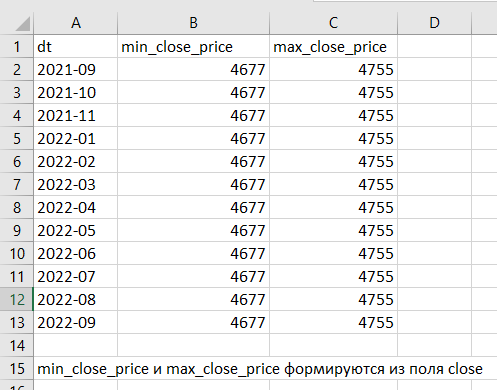

## Примечание
Взять не Лукойл и не Магнит

Подумать как отслеживать переход на новый месяц?
- Можно идти по всем строкам

Можно сделать 2 переменные min и max, по мере того, как перебираю строки делать сравнения с этими переменными и при необходимости 

Проверку подсчитанных значений для каждого месяца можно сделать через фильтрацию в Excel.


## Решение

In [266]:
import pandas as pd
import numpy as np

# Чтобы не подключать GD закидываю файл в временное пространство
# /content/PHOR_210901_220831.csv

In [267]:
dataFile = '/content/PHOR_210901_220831.csv'

df = pd.read_csv(dataFile)
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,PHOR,D,20210901,0,4882.0,4887.0,4679.0,4755.0,170973
1,PHOR,D,20210902,0,4756.0,4765.0,4642.0,4677.0,146352
2,PHOR,D,20210903,0,4687.0,4753.0,4653.0,4724.0,159519
3,PHOR,D,20210906,0,4741.0,4843.0,4733.0,4801.0,171143
4,PHOR,D,20210907,0,4830.0,4929.0,4816.0,4902.0,120932
...,...,...,...,...,...,...,...,...,...
230,PHOR,D,20220826,0,7880.0,7979.0,7863.0,7979.0,51600
231,PHOR,D,20220829,0,7980.0,8077.0,7979.0,8020.0,39734
232,PHOR,D,20220830,0,8016.0,8050.0,7960.0,7962.0,30826
233,PHOR,D,20220831,0,7949.0,8040.0,7666.0,7918.0,59729


In [268]:
# Для работы мне нужны только столбцы
# DATE HIGH LOW CLOSE 
# Оставлю только их с помощью функции reindex
# TODO: Можно ли оптимизировать и сразу считывать только необходимые столбцы из файла?

df = df.reindex(['<DATE>', '<CLOSE>'], axis=1) # axis: 0 - строки 1 - столбцы
df

,<DATE>,<CLOSE>
0,20210901,4755.0
1,20210902,4677.0
2,20210903,4724.0
3,20210906,4801.0
4,20210907,4902.0
...,...,...
230,20220826,7979.0
231,20220829,8020.0
232,20220830,7962.0
233,20220831,7918.0


In [269]:
# В каком формате должна хранится дата, чтобы можно было отслеживать переход на новый месяц?
#
# ОТВЕТ: В строковом формате соответствующему форме хранения времени.
# Буду выцеплять месяц для каждой строки и проверять на != предыдущему.
#
# Для 1ой строки такую проверку делать не нужно будет.
# 
# 
# Преобразовывать текст в даты нет необходимости
# df["<DATE>"] = pd.to_datetime(df["<DATE>"])
# df

In [270]:
d = df["<DATE>"] # тип данных int

d = [str(d1) for d1 in d]  # преобразование в str

# перевод дат в стандартный вид # dd-mm-yyyy

d_standart = []
for dt in d:
    d_standart.append(dt[6:8] + "-" + dt[4:6] + "-" + dt[0:4])


print(d_standart)
# Возращаю в df
df["<DATE>"] = d_standart

df.head(31)

['01-09-2021', '02-09-2021', '03-09-2021', '06-09-2021', '07-09-2021', '08-09-2021', '09-09-2021', '10-09-2021', '13-09-2021', '14-09-2021', '15-09-2021', '16-09-2021', '17-09-2021', '20-09-2021', '21-09-2021', '22-09-2021', '23-09-2021', '24-09-2021', '27-09-2021', '28-09-2021', '29-09-2021', '30-09-2021', '01-10-2021', '04-10-2021', '05-10-2021', '06-10-2021', '07-10-2021', '08-10-2021', '11-10-2021', '12-10-2021', '13-10-2021', '14-10-2021', '15-10-2021', '18-10-2021', '19-10-2021', '20-10-2021', '21-10-2021', '22-10-2021', '25-10-2021', '26-10-2021', '27-10-2021', '28-10-2021', '29-10-2021', '01-11-2021', '02-11-2021', '03-11-2021', '05-11-2021', '08-11-2021', '09-11-2021', '10-11-2021', '11-11-2021', '12-11-2021', '15-11-2021', '16-11-2021', '17-11-2021', '18-11-2021', '19-11-2021', '22-11-2021', '23-11-2021', '24-11-2021', '25-11-2021', '26-11-2021', '29-11-2021', '30-11-2021', '01-12-2021', '02-12-2021', '03-12-2021', '06-12-2021', '07-12-2021', '08-12-2021', '09-12-2021', '10-1

,<DATE>,<CLOSE>
0,01-09-2021,4755.0
1,02-09-2021,4677.0
2,03-09-2021,4724.0
3,06-09-2021,4801.0
4,07-09-2021,4902.0
5,08-09-2021,4937.0
6,09-09-2021,4826.0
7,10-09-2021,4825.0
8,13-09-2021,4907.0
9,14-09-2021,5140.0


In [271]:
# Формирование result_df
result_df = pd.DataFrame(columns=['dt', 'min_close_price', 'max_close_price'])
result_df

,dt,min_close_price,max_close_price


In [272]:
min_close_price =  999999999
max_close_price = -999999999

prev_row_month = None

# Перебор строк в цикле
for ind, values in df.iterrows(): 
    if values["<CLOSE>"] < min_close_price:
        min_close_price = values["<CLOSE>"]
    if values["<CLOSE>"] > max_close_price:
        max_close_price = values["<CLOSE>"]
    

    if ind == 0: # Пропуск на 1ой итерации
        prev_row_month = values["<DATE>"].split('-')[1] #  Сохраняю только месяц
        continue
    
    if prev_row_month != values["<DATE>"].split('-')[1]: # Переход на новый месяц
        print(prev_row_month)
        print(values)

        # Добавить строку в результирующий датасет
        new_row = {'dt':values["<DATE>"], 'min_close_price':min_close_price, 'max_close_price':max_close_price}
        result_df = result_df.append(new_row, ignore_index=True)
        # Сбросить значения для подсчёта
        min_close_price =  999999999
        max_close_price = -999999999
    prev_row_month = values["<DATE>"].split('-')[1] #  Сохраняю только месяц

09
<DATE>     01-10-2021
<CLOSE>        5115.0
Name: 22, dtype: object
10
<DATE>     01-11-2021
<CLOSE>        5658.0
Name: 43, dtype: object
11
<DATE>     01-12-2021
<CLOSE>        5513.0
Name: 64, dtype: object
12
<DATE>     03-01-2022
<CLOSE>        5936.0
Name: 86, dtype: object
01
<DATE>     01-02-2022
<CLOSE>        5512.0
Name: 106, dtype: object
02
<DATE>     24-03-2022
<CLOSE>        6350.0
Name: 124, dtype: object
03
<DATE>     01-04-2022
<CLOSE>        7400.0
Name: 130, dtype: object
04
<DATE>     04-05-2022
<CLOSE>        7043.0
Name: 151, dtype: object
05
<DATE>     01-06-2022
<CLOSE>        7220.0
Name: 169, dtype: object
06
<DATE>     01-07-2022
<CLOSE>        7800.0
Name: 190, dtype: object
07
<DATE>     01-08-2022
<CLOSE>        7305.0
Name: 211, dtype: object
08
<DATE>     01-09-2022
<CLOSE>        8009.0
Name: 234, dtype: object


In [273]:
result_df

,dt,min_close_price,max_close_price
0,01-10-2021,4677.0,5145.0
1,01-11-2021,5026.0,6019.0
2,01-12-2021,5513.0,5915.0
3,03-01-2022,5506.0,5936.0
4,01-02-2022,5330.0,5910.0
5,24-03-2022,5015.0,6350.0
6,01-04-2022,6951.0,8908.0
7,04-05-2022,6760.0,7380.0
8,01-06-2022,7074.0,7990.0
9,01-07-2022,7013.0,8085.0


Для проверки сделал выгрузку в excel и посмотрел достоверность результата

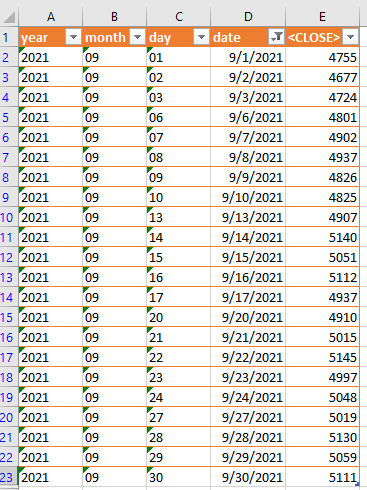